In [71]:
import pandas as pd

data = pd.read_csv("https://projectbase.medien.hs-duesseldorf.de/eild.nrw-module/daw/-/raw/main/kc_house_data.csv")
data.index = data["id"]
data.drop(["id", "date"], axis=1, inplace=True)
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


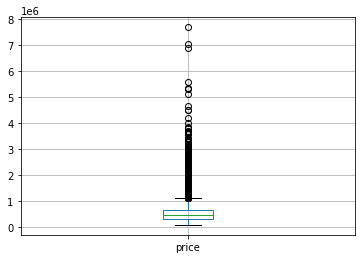

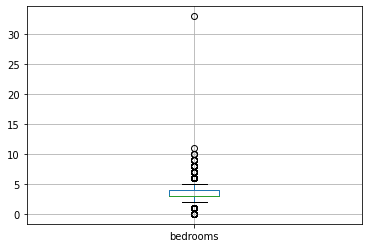

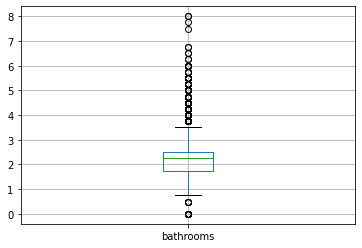

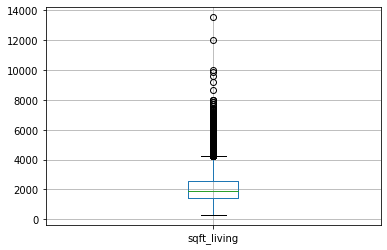

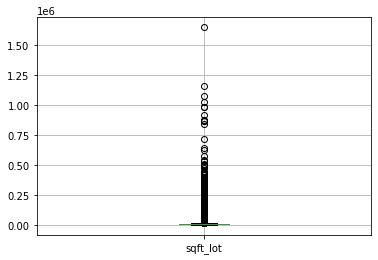

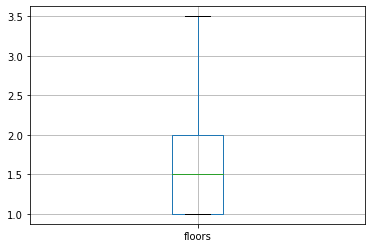

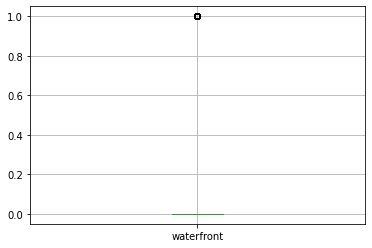

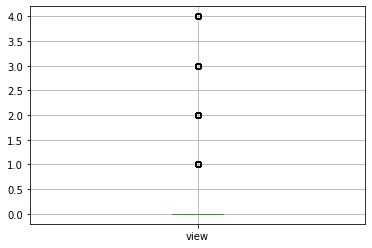

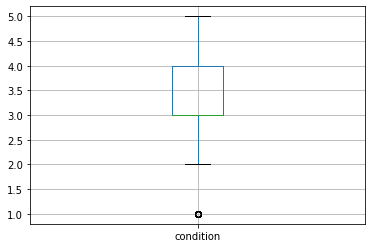

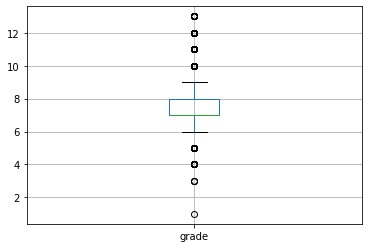

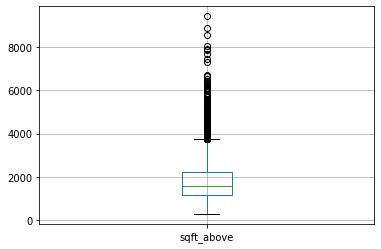

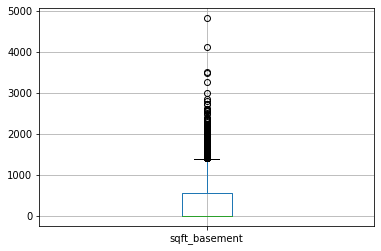

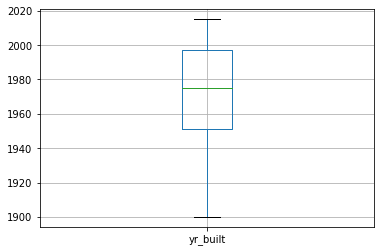

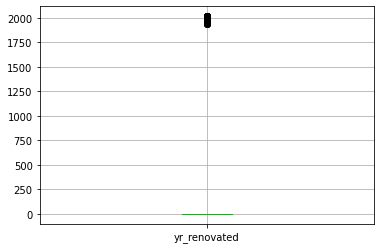

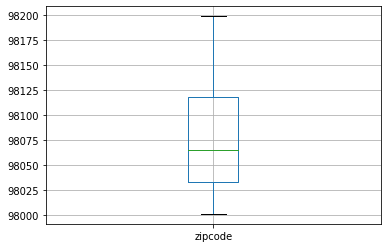

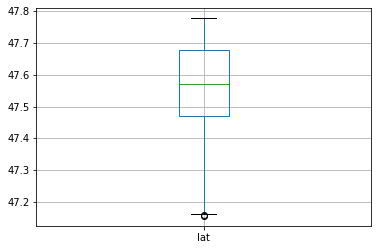

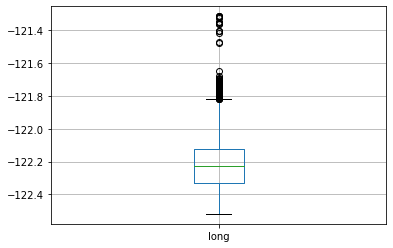

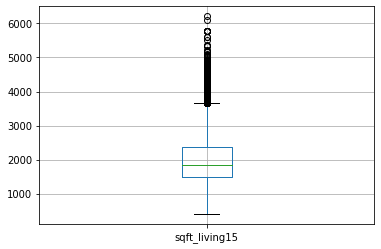

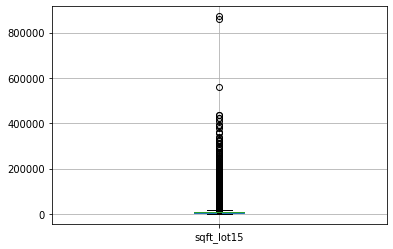

In [76]:
normalized_data=(data-data.min())/(data.max()-data.min())
for col in data.columns:
    pd.DataFrame(data[col]).boxplot()
    plt.show()

In [26]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [84]:
from sklearn.ensemble import IsolationForest
data_without_na = data.dropna()
display(data_without_na.shape)
X = data_without_na.drop('price', axis=1)
y = data_without_na['price']
data_without_outliers = {}
contaminations = [0.05, 0.1, 0.2]
for contamination in contaminations:
    iso = IsolationForest(contamination=0.05)
    y_out = iso.fit_predict(X)

    # build a mask to select all rows that are not outliers (inlier=1, outlier=-1)
    mask = y_out != 1
    X_outliers, y_outliers = X[mask], y[mask]

    # Inliers vs. Outliers
    print("Inliers: ",X.shape[0]-X_outliers.shape[0],"Outliers:",X_outliers.shape[0])

    # display(X_red)
    data_without_outliers[contamination] = data_without_na.drop(X_outliers.index)

(21613, 19)

/Users/direnctimurprivat/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Inliers:  20532 Outliers: 1081


/Users/direnctimurprivat/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Inliers:  20532 Outliers: 1081


/Users/direnctimurprivat/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Inliers:  20532 Outliers: 1081


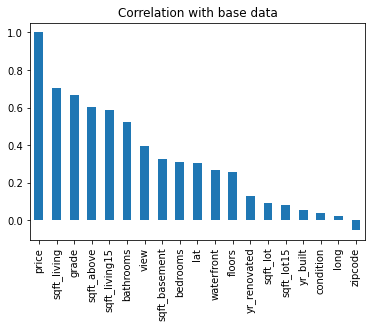

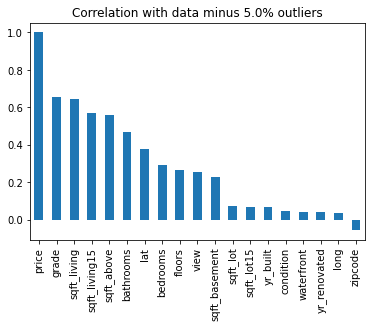

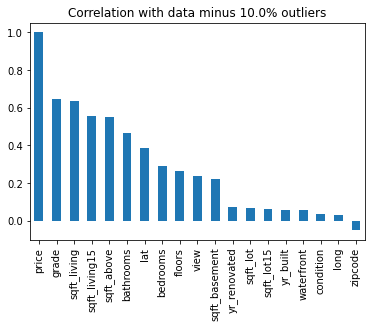

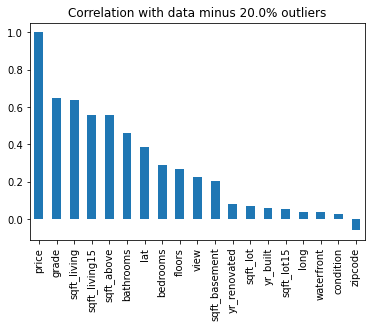

In [85]:
import matplotlib.pyplot as plt

price_corr = data.corr()["price"].sort_values(ascending=False)
price_corr.plot(kind="bar", title="Correlation with base data")
plt.show()
for contamination in contaminations:
    price_corr = data_without_outliers[contamination].corr()["price"].sort_values(ascending=False)
    price_corr.plot(kind="bar", title=f"Correlation with data minus {contamination*100}% outliers")
    plt.show()